Let's try to read the data into a list first

In [25]:
import csv
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


X_data = []
y_data = []
with open('DATA/Linear/X.csv', 'rb') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        X_data.append([float(x.strip()) for x in row[0].split(',')])
        
with open('DATA/Linear/y.csv', 'rb') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        y_data.append(np.float(row[0]))

Lets convert this list into an array now

In [26]:
X = np.array(X_data)
y = np.array(y_data)
y = [int(yy) for yy in y]

Lets try to visualizze our data as a scatter plot

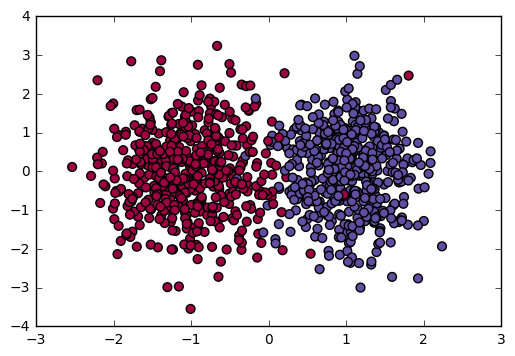

In [27]:
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [28]:
num_data = len(X) 
inputs = 2 
outputs = 2 

# lets define a learning alpha and regularization beta
apha = 0.01 
beta = 0.01 

This calculates total dataset loss

In [29]:
def calc_total_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probabilities = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    actual_probabilties = -np.log(probabilities[range(num_data), y])
    loss = np.sum(actual_probabilties)
    # Add beta to loss
    loss += beta/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_data * loss

Actual method to predict probability (between 0 and 1)

In [30]:
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probabilities = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probabilities, axis=1)

In [32]:
def construct_model(nodes_hidden, print_loss=False):
    
    # Initialize randomly
    np.random.seed(0)
    W1 = np.random.randn(inputs, nodes_hidden) / np.sqrt(inputs)
    b1 = np.zeros((1, nodes_hidden))
    W2 = np.random.randn(nodes_hidden, outputs) / np.sqrt(nodes_hidden)
    b2 = np.zeros((1, outputs))
    model = {}
    
    # EMploy Gradient descent, 2000 passes
    for i in xrange(0, 2000):

        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        delta3 = probs
        delta3[range(num_data), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add reg. beta
        dW2 += beta * W2
        dW1 += beta * W1

        #Now, update
        W1 += -alpha * dW1
        b1 += -alpha * db1
        W2 += -alpha * dW2
        b2 += -alpha * db2
        
        # Reassign
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        #For TEST, uncomment if needed
        #if print_loss and i % 1000 == 0:
        # print "Loss after iteration %i: %f" %(i, calc_total_loss(model))
    
    return model

In [33]:
#TODO need to plot with X and Y?
def make_decision_boundary(pred_func):
    
    #Do some plot stuff
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    Dist = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, Dist), np.arange(y_min, y_max, Dist))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Loss after iteration 0: 0.086970
Loss after iteration 1000: 0.067667


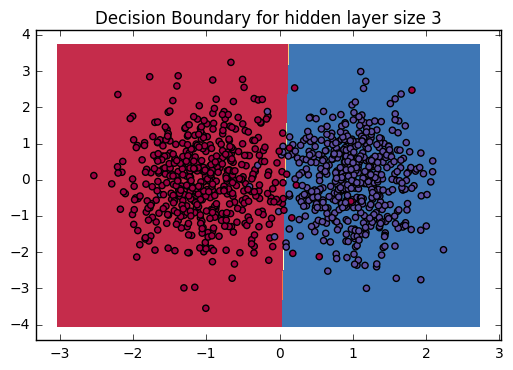

In [34]:
# Build a model with a 3-dimensional hidden layer
model = construct_model(1, print_loss=True)

# Plot the decision boundary
make_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

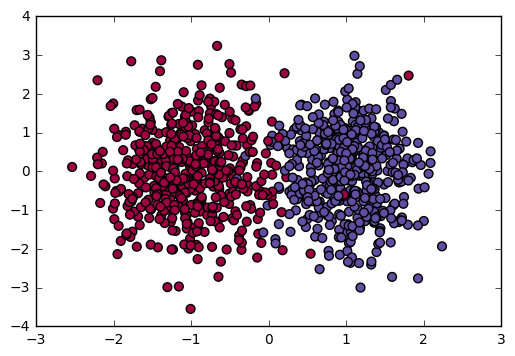

In [35]:
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)